<h1 align="center">
    <img 
        src="../img/logo_white_bg.jpeg" 
        width="200" 
        border="1" />
</h1>
<h1 align="center">
    <b>GenAISHAP</b>
</h1>
<h4 align="center">
    <i>Explanations for Generative AI, LLM-and-SLM-Based, Solutions</i> ⚡️
</h4>



Generative AI SHAP (GAISHAP) is a python library that supports the creation of explanations to the metrics obtained for solutions based on LLMs (Large Language Models) or SLMs (Small Language Models). 

In summary, ***GenAISHAP*** works as follows:  ***GenAISHAP*** will create regression models, which we call them **black-box models**, for each of the metrics and will use those black-box models to produce explanations for each metric. The models are created from features extracted from the provided questions. Those **question features** could be generated automatically, using a tool, named **Featurizer** incorporated in the library or they can be manually created.

The previous notebooks showed an example of how to:

1. create the **Input** for ***GenAISHAP***, which is a simple Pandas DataFrame with the evaluation dataset with the `user_input` column and numerical columns that defines the generative AI metrics to create explanations.
2. The next notebook showed how to use the **Featurizer** tool to automatically create the characteristics of the user inputs that are going to be used as regressors of the black-models that are going to be used to create the explainers.

This notebook shows an example of how to create and use the explainers created on top of the user inputs and the features created in the previous notebooks. The following are the steps, that need to be done:

- Feature engineering
- Regression black-box model training
- Creation of SHAP explainers


In [1]:
import pandas as pd
from genaishap import GenAIExplainer
import shap
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [2]:
shap.initjs()

# 1. Load test and features

The following cell loads the pandas dataframes related to the test dataset and features created in the previous steps. And shows a single view of all the data.

In [3]:
df_test_dataset = pd.read_json('./test-dataset.json', orient='records')
df_features = pd.read_json('./test-features.json', orient='records')
df_test_dataset.join(df_features)

,user_input,retrieved_contexts,response,reference,faithfulness,context_precision,context_recall,there_is_any_company_identified_in_the_question,list_of_companies_identified_in_the_question,there_is_any_topic_or_initiative_identified_in_the_question,...,is_a_question_about_financial_or_economic_aspects,is_a_question_about_technological_or_innovative_aspects,is_a_question_about_historical_or_past_data,is_a_question_about_future_projections_or_plans,is_a_question_about_document_structure_or_content,is_a_question_about_testimonials_or_quotes,is_a_question_about_partnerships_or_collaborations,is_a_question_about_emissions_or_climate_change,is_a_question_about_resource_management_or_efficiency,is_a_question_about_diversity_or_inclusion
0,What is the objective of the Carbon Call initi...,"[In 2022, we also released a preview version o...",The objective of the Carbon Call initiative is...,The objective of Carbon Call is to unify the w...,1.000000,1.0,1.000000,False,[],True,...,False,False,False,True,False,False,False,True,False,False
1,What are the three key areas that will enable ...,[What’s next \nScope 3 emissions reduction \nM...,The three key areas that will enable the scale...,1 Advancing AI solutions for greater climate i...,0.750000,0.0,0.666667,False,[],True,...,False,True,False,True,False,False,False,True,True,False
2,How many people in India did Microsoft provide...,"[Chile\nSouth Africa\n16,408 \nBrazil\n340 \n...","Microsoft provided water access to 225,389 peo...","309,921",0.000000,0.0,0.000000,True,[Microsoft],True,...,False,False,False,False,False,False,True,False,True,False
3,How many people in Indonesia did Microsoft pro...,"[Chile\nSouth Africa\n16,408 \nBrazil\n340 \n...",The specific number of people in Indonesia pro...,"225,389",1.000000,1.0,0.000000,True,[Microsoft],True,...,False,False,False,False,False,False,True,False,True,False
4,How many people in Brazil did Microsoft provid...,"[Chile\nSouth Africa\n16,408 \nBrazil\n340 \n...","Microsoft provided water access to 552,058 peo...","16,408",1.000000,1.0,0.000000,True,[Microsoft],True,...,False,False,False,False,False,False,True,False,True,False
5,How many people in Mexico did Microsoft provid...,[Improving access \nto water \nWe continue to ...,"Microsoft provided water access to 309,921 peo...",340,0.000000,0.0,1.000000,True,[Microsoft],True,...,False,False,False,False,False,False,False,False,True,False
6,How many more acres of land does Microsoft nee...,[• • \na \n47\n | | | \nCommitments and progre...,"According to Ecosystems Chart 1, Microsoft has...",4998 more acres,0.800000,1.0,1.000000,True,[Microsoft],True,...,False,False,False,True,False,False,False,False,True,False
7,What key insight was listed in page 56 of the ...,[Leadership About Highlights How We Operate Wh...,The context provided does not include informat...,25%\nWe are reducing idle power consumption of...,1.000000,0.0,0.000000,False,[],False,...,False,False,False,False,True,False,False,False,False,False
8,What key insight was listed in page 61 of the ...,[Leadership About Highlights How We Operate Wh...,The context provided does not include informat...,100%\nOur key European and American distributi...,1.000000,0.0,0.000000,False,[],False,...,False,False,False,False,True,False,False,False,False,False
9,What are the four commitments listed on page 66?,[UN Sustainable Development Goal Apple’s suppo...,The four commitments listed on page 66 are: \n...,1. Using our voice on climate-related public p...,0.250000,0.0,0.000000,False,[],True,...,False,False,False,True,True,False,False,False,False,False


# 2. Initialize the GenAI Explainer object

The following cell just initializes and checks consistency of the data to be used to create the explainers

In [4]:
genai_explainer = GenAIExplainer.from_pandas(df_test_dataset, df_features)

# 3. Feature engineering

All the columns in the `df_feature` dataframe are pre-processed as follows:

1. All the **boolean** features are mapped to a numerical feature of 0s and 1s.
2. All the **list of string** features are mapped to a one-hot-vector matrix.
3. All the features with zero variance are removed.

The following cell executes the feature engineering and shows the final X that will be used to train the black-box models

In [5]:
genai_explainer.feature_engineering()
X = pd.DataFrame(genai_explainer.preprocessed_features)
pd.DataFrame(genai_explainer.metrics).join(X)

,faithfulness,context_precision,context_recall,there_is_any_company_identified_in_the_question,list_of_companies_identified_in_the_question__google,list_of_companies_identified_in_the_question__netflix,list_of_companies_identified_in_the_question__facebook,list_of_companies_identified_in_the_question__meta,list_of_companies_identified_in_the_question__microsoft,list_of_companies_identified_in_the_question__amazon,...,is_a_question_about_financial_or_economic_aspects,is_a_question_about_technological_or_innovative_aspects,is_a_question_about_historical_or_past_data,is_a_question_about_future_projections_or_plans,is_a_question_about_document_structure_or_content,is_a_question_about_testimonials_or_quotes,is_a_question_about_partnerships_or_collaborations,is_a_question_about_emissions_or_climate_change,is_a_question_about_resource_management_or_efficiency,is_a_question_about_diversity_or_inclusion
0,1.000000,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.750000,0.0,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.000000,1.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
5,0.000000,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.800000,1.0,1.000000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
9,0.250000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# 4. Training and validation of the black-box models

The training uses a local AutoML and a Hyperparameter tuning tool to calculate the best model to fit each metric.

> During the training and selection of the best models a **t-test** is performed to evaluate if the estimated metric using the models produces a statistically related sample from the same population of the original metric: fail to reject the null hypothesis that both, the original metric and the estimated metric are samples from the same population. If the t-test rejects the null hypothesis a warning message is displayed during the creation of the explainers.  The explainers cannot be used as reference. 


In [6]:
genai_explainer.create_explainers()

Metric loop:   0%|          | 0/3 [00:00<?, ?it/s]

faithfulness:   0%|          | 0/3 [00:00<?, ?it/s]

/workspace/src/genaishap/explainer.py:298: UserWarning: There are 3 estimated values in the metric faithfulness far from the original values. The following is the list of indexes [2, 3, 4].
  warnings.warn(


context_precision:   0%|          | 0/3 [00:00<?, ?it/s]

/workspace/src/genaishap/explainer.py:298: UserWarning: There are 3 estimated values in the metric context_precision far from the original values. The following is the list of indexes [2, 3, 4].
  warnings.warn(


context_recall:   0%|          | 0/3 [00:00<?, ?it/s]

/workspace/src/genaishap/explainer.py:298: UserWarning: There are 11 estimated values in the metric context_recall far from the original values. The following is the list of indexes [0, 1, 5, 13, 14, 15, 21, 25, 26, 41, 42].
  warnings.warn(


In [7]:
genai_explainer.r2_scores_

{'faithfulness': 0.8850470330928326,
 'context_precision': 0.935173076227646,
 'context_recall': 0.9999205519434022}

> Also, as a rule of thumb, if the `r2_score` is high (>0.75) the explanations of black-box model could be used as reference. If it is lower, the use of the explainers could produce misleading conclusions.

Just as an example, let's use **context_recall** for now.  It is possible, at this point to generate explanations at the full dataset level to answer questions like: *What are the more relevant features of the questions that drives a higher, or lower **context_recall**?*

# 5. Dataset level explainers

In [8]:
metric = 'context_recall'

X = pd.DataFrame(genai_explainer.preprocessed_features)
metric_explainer = genai_explainer.explainers_[metric]
shap_values = metric_explainer(X)

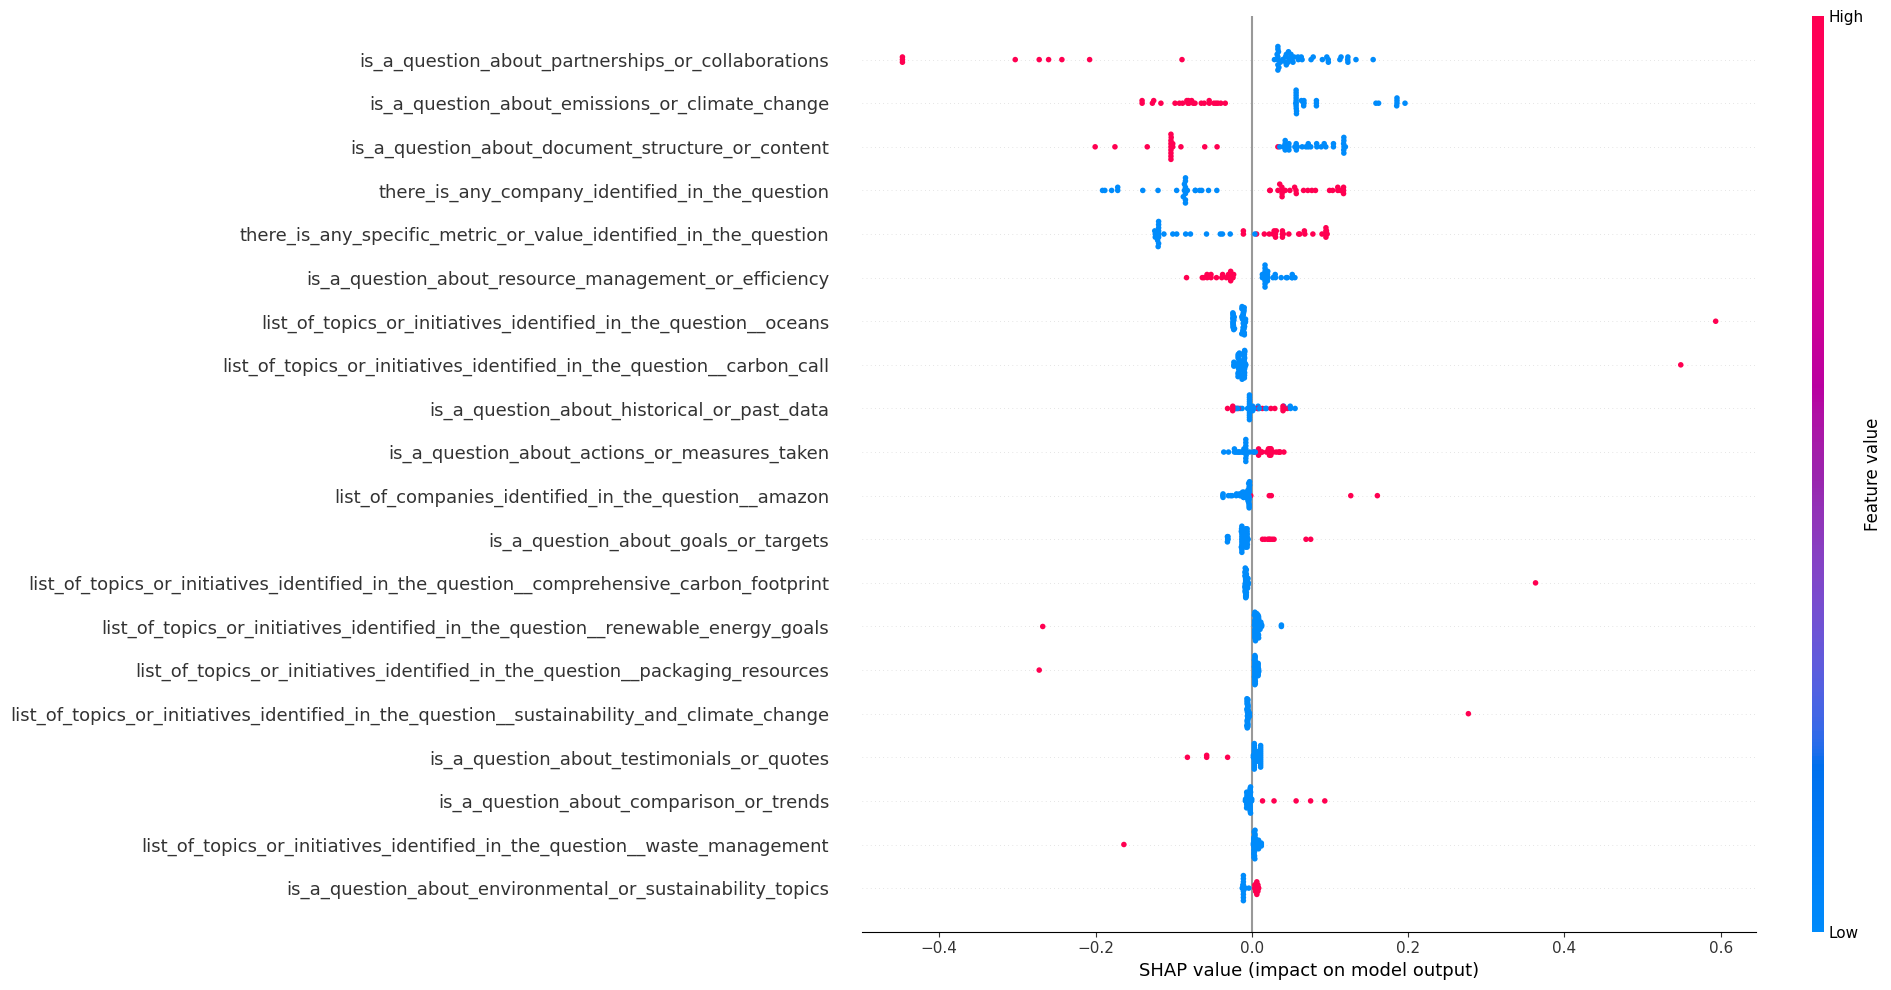

In [9]:
shap.summary_plot(shap_values, X, plot_size=(20,10))

> From this plot we can conclude, for example, that the **context recall**:
> - Is higher when there is a company identified in the question.
> - Also is higher when the question is about goals about goals and targets.
> - Also, we can conclude that the **context recall** is lower in the questions with explicit reference to Amazon, in contrast with the questions with explicit reference to Apple or Facebook. 
> 
> This type of information can be used as insights to guide next steps to improve the overall **context recall** of the solution.

# 6. Instance level explainers

During the creation of the explainers other warnings related to the safe use of the explainers can be raised. For example warinings like the following can be risen when creating the explainers for the **context recall** metric:

> `UserWarning: There are 6 estimated values in the metric context_recall far from the original values. The following is the list of indexes [24, 25, 26, 27, 31, 41].`

These warnings are shown because during the creation of the training of the black-box model to create the explainers, there is a process to evaluate how far are the estimated values of each metric compared to the original one, using t-distribution and confidence intervals.  If an instance is out of the confidence interval it is marked as too far from the original value and the warning is shown to alert the user to use carefully the instance explanations for those specific instances.

The following table shows a comparison of the original metric values compared with the estimated values calculated using the black-box model, and the identification if the instance is **out of range** and therefore the explanations should be used carefully for those instances.


In [10]:
df_metric = pd.DataFrame(genai_explainer.metrics)[[metric]]
df_metric['estimated_value'] = genai_explainer.estimators_[metric].predict(X)
df_metric['is_out_of_range'] = genai_explainer.is_out_of_range_[metric]

df_metric.style.apply(
    lambda s : [
        'background-color: yellow' if s.loc['is_out_of_range'] else '' for v in s.index
    ], axis=1)

,context_recall,estimated_value,is_out_of_range
0,1.000000,0.995023,True
1,0.666667,0.660896,True
2,0.000000,0.001921,False
3,0.000000,0.001921,False
4,0.000000,0.001921,False
5,1.000000,0.986221,True
6,1.000000,0.999960,False
7,0.000000,-0.000920,False
8,0.000000,-0.000920,False
9,0.000000,0.003130,False


As an example let's pick the 14th index, which has a **context recall** of 0, and an extimated value of 0.001. The following are the details of that instance:

In [11]:
index = 14

context = df_test_dataset.loc[index,'retrieved_contexts']
context_str = "\n".join([f"\n**CHUNK {i+1}:**\n\n{c}" for i, c in zip(range(len(context)),context)])


index_details = f"""
### INDEX {index}

**USER INPUT:**
{df_test_dataset.loc[index,'user_input']}

**RETRIEVED CONTEXT:**

{context_str}

**RESPONSE:**
{df_test_dataset.loc[index,'response']}

**REFERENCE:**
{df_test_dataset.loc[index,'reference']}

**METRIC:** {metric}

**METRIC Value:** {df_test_dataset.loc[index, metric]:.3f}

**MODEL ESTIMATED Value:** {df_metric.loc[index, 'estimated_value']:.3f}
"""

display(Markdown(index_details))


### INDEX 14

**USER INPUT:**
What percentage of waste from Google's offices globally were diverted away from landfills in 2021?

**RETRIEVED CONTEXT:**


**CHUNK 1:**

Performance highlights
The following section provides a snapshot of our performance as of the end 
of 2021—demonstrating how we’re strengthening our business by reducing 
the environmental impact of our operations and working to empower people 
everywhere to live more sustainably. 
For a more complete overview of our performance over time, see the 
environmental data table.
DESIGNING EFFICIENT DATA CENTERS
Energy GHG	emissions
2X  
as	energy	efficient
On average, a Google data center  
is twice as energy efficient as a 
typical enterprise data center. 1 
5X  
as	much	computing	power
Compared with five years ago,  
we now deliver around five times 
as much computing power with the 
same amount of electrical power.
1.10  
average	annual	PUE
In 2021, the average annual PUE 2  
for our global fleet of data centers 
was 1.10, compared with the industry 
average of 1.57 3—meaning that 
Google data centers use about  
six times less overhead energy.
0  
operational	GHG	emissions	
after	compensations
Whether someone is using Google 
at home or as part of an organization 
running Google Cloud or Google 
Workspace, all products in our Cloud 
are carbon neutral—meaning that 
the operational GHG emissions 
associated with running workloads  
on our infrastructure have been 
reduced through procurement of 
renewable energy and any residual 
emissions have been compensated  
for with high-quality carbon credits. 4 
Waste
78%  
of	waste	diverted
In 2021, we diverted 78% of waste 
from our global data center 
operations away from landfills.
27%  
of	components	refurbished
In 2021, 27% of components  
used for server upgrades were 
refurbished inventory.
4.9	million	 
components	resold
In 2021, we resold more than 
4.9 million components into the 
secondary market for reuse by  
other organizations. 
5
Google Environmental Report 2022

**CHUNK 2:**

DESIGNING EFFICIENT DATA CENTERS 
Target Deadline 2021	progress Status
Energy
Maintain or improve average annual fleet-wide  
PUE across Google data centers year over year.
2021 
(Annual)
In 2021, the average annual PUE for our global fleet  
of data centers was 1.10. Since 2012, our average annual  
fleet-wide PUE has stayed at or below 1.12, even as 
demand for our products has dramatically risen.
Certifications
Maintain ISO 50001 energy management system 
certification for Google-owned data centers  
that meet certain operational milestones.
2021 
(Annual)
In 2021, we maintained our ISO 50001 certification for  
our operational European data centers. We were the  
first major internet company to achieve a multi-site  
energy management system certification to ISO 50001, 
which we first attained in 2013.
Waste
Achieve Zero Waste to Landfill for our global  
data center operations.
Not 
applicable
In 2021, our global landfill diversion rate for data center 
operations was 78%.
Water
Replenish 120% of the water we consume,  
on average, across our offices and data centers,  
and help restore and improve the quality of  
water and health of ecosystems in the  
communities where we operate.
2030 We’re working toward this target. By the end  
of 2021, we had supported 13 water stewardship 
projects spanning 10 river basins where we operate 
and/or source water. Examples of these projects 
include wetland restoration, rainwater harvesting,  
and land conservation.
Progress against targets
As a data-driven company, we believe it is critical to regularly track progress 
toward our commitments and share updates with our stakeholders. The 
following section provides an overview of our 2021 progress toward our 
various environmental targets. 
For a more complete overview of our performance over time, see the 
environmental data table.
Achieved Missed In progress
8
Google Environmental Report 2022

**RESPONSE:**
The percentage of waste from Google's offices globally that was diverted away from landfills in 2021 is not specified in the provided information. However, 78% of waste from Google's global data center operations was diverted away from landfills in 2021.

**REFERENCE:**
Sixty-four percent.

**METRIC:** context_recall

**METRIC Value:** 0.000

**MODEL ESTIMATED Value:** 0.005


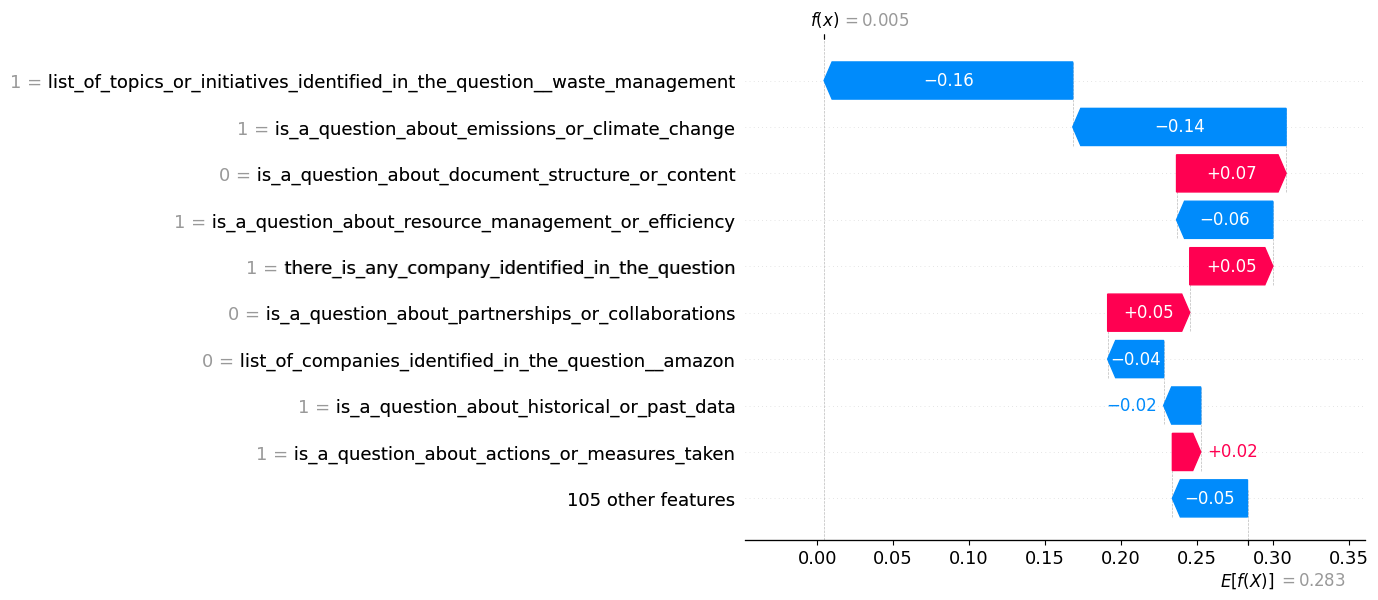

In [12]:
shap.waterfall_plot(shap_values[index])

> The horizontal axis of the SHAP waterfall plot shows the contributions of individual features to the model's prediction for a specific instance. The sum of all the contributions will be the final instance predicted value. 
>
> From this plot we can conclude that the reduction of the **context recall** for this specific instance was mainly driven by don't having an explicit mention of a company together with the mention of an specific initiative or program
> 
> This type of information add insights at the instance level on how to improve the overal quality of the solution.
